# Spambase Inference
Group 7 - Project Proposal
- Evan Armstrong
- Rapeewit Chanprakaisi #57529208
- Riyan Qureshi
- Kathryn Wu

## Introduction

The `Spambase` dataset is a collection of assorted emails. Its variables include the frequencies of various words, lengths of capital letter sequences, and class, spam(1) or non-spam(0).

Spam email is unsolicited bulk email, often explicit or commercial, and has been an issue since the 1990s (Cranor et al., 1998, p.74). Spam is low-cost to send, but burdens service providers and recipients. While declining as of 2013, spam has become sophisticated, disguising itself from filters (Irani et al., 2013, p.2).

Due to spam's evolution, people may eventually need to manually separate spam and non-spam. To assist their intuition with data, we will look for consistent content difference between the two. We focus on the average length of sequences of capital letters, assuming that spam likley uses capitalization to create false urgency and garner attention.

The question we set out to answer is:

**"Is the mean average length of uninterrupted sequences of capital letters different for spam and non-spam email?"**

## Preliminary Results

We will first load the needed packages.

In [1]:
library(tidyverse)
library(repr)
library(cowplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




`read.csv()` reads the dataset from the web. The data is tidy, but we need to rename the columns with `col_names()`and convert 0 and 1 to 'non-spam' and 'spam' in the class variable. 

In [2]:
spambase <- read.csv("https://raw.githubusercontent.com/rchanpra/stat-201-project/main/spambase/spambase.data")

In [3]:
colnames(spambase) <- c("word_freq_make","word_freq_address","word_freq_all","word_freq_3d","word_freq_our",
                        "word_freq_over","word_freq_remove","word_freq_internet","word_freq_order","word_freq_mail",
                        "word_freq_receive","word_freq_will","word_freq_people","word_freq_report","word_freq_addresses",
                        "word_freq_free","word_freq_business","word_freq_email","word_freq_you","word_freq_credit",
                        "word_freq_your","word_freq_font","word_freq_000","word_freq_money","word_freq_hp",
                        "word_freq_hpl","word_freq_george","word_freq_650","word_freq_lab","word_freq_labs",
                        "word_freq_telnet","word_freq_857","word_freq_data","word_freq_415","word_freq_85",
                        "word_freq_technology","word_freq_1999","word_freq_parts","word_freq_pm","word_freq_direct",
                        "word_freq_cs","word_freq_meeting","word_freq_original","word_freq_project", "word_freq_re",
                        "word_freq_edu","word_freq_table","word_freq_conference","char_freq_;","char_freq_(",
                        "char_freq_[","char_freq_!","char_freq_$","char_freq_#","capital_run_length_average",
                        "capital_run_length_longest","capital_run_length_total","class")

In [4]:
spambase <- spambase %>% 
    mutate(class = ifelse(class == 1, "spam", "non-spam"))

In [5]:
nrow(spambase)

[1] 4600

In [6]:
head(spambase)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,⋯,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
1,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,⋯,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,spam
2,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,⋯,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,spam
3,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,spam
4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,spam
5,0.00,0.00,0.00,0,1.85,0.00,0.00,1.85,0.00,0.00,⋯,0.00,0.223,0,0.000,0.000,0.000,3.000,15,54,spam
6,0.00,0.00,0.00,0,1.92,0.00,0.00,0.00,0.00,0.64,⋯,0.00,0.054,0,0.164,0.054,0.000,1.671,4,112,spam


We compute the sample mean and standard deviation of the average run length of capital letters, the count of spam and non-spam, and the difference in means.

In [7]:
# Considering that the dataset is a sample from the larger population of spam email,
# computing the mean and standard deviation of the word frequencies for each class produces our point estimates
# We select the columns we need (class and capital_run_length_average)

spambase_selected <- spambase %>% 
    select(capital_run_length_average,class)

spambase_stats <- spambase_selected %>% 
    group_by(class) %>% 
    summarize(mean_capital_run_length_average = mean(capital_run_length_average), 
              sd_capital_run_length_average = sd(capital_run_length_average), 
              n = n())

spambase_stats

class,mean_capital_run_length_average,sd_capital_run_length_average,n
<chr>,<dbl>,<dbl>,<int>
non-spam,2.377301,5.113685,2788
spam,9.522345,49.859762,1812


In [8]:
diff_in_means <- spambase_stats$mean_capital_run_length_average[2] - spambase_stats$mean_capital_run_length_average[1]

diff_in_means

[1] 7.145045

Spam has a greater sample mean and standard deviation than non-spam email.

We visualize the sample distribution using `geom_boxplot()` and `geom_histogram()`.

In [9]:
# Graph the distribution of variable of interest for each class, with vertical lines indicating the means of each class
spam_boxplot <- spambase_selected %>% 
    ggplot() + 
    geom_boxplot(aes(class, capital_run_length_average, fill = class), outlier.shape = NA) + 
    # we do not display some extreme values, which are impractical to plot
    scale_y_continuous(limits = c(0, 10)) + 
    theme(text = element_text(size = 10)) + 
    ggtitle("Boxplot of average length of capital letter runs for Spam and Non-Spam emails") + 
    xlab("Class") + 
    ylab("Average length of uninterrupted sequence of capital letters")

In [10]:
spam_histogram <- spambase_selected %>% 
    filter(class == "spam") %>% 
    ggplot() + 
    geom_histogram(aes(x = capital_run_length_average, y = after_stat(density)), binwidth = 0.2) + 
    # we do not display some extreme values, which are impractical to plot
    scale_x_continuous(limits = c(0, 50)) + 
    theme(text = element_text(size = 10)) + 
    ggtitle("Sample distribution of mean length of capital letter runs for Spam emails") + 
    ylab("Frequency") + 
    xlab("Average length of uninterrupted sequence of capital letters")

non_spam_histogram <- spambase_selected %>% 
    filter(class == "non-spam") %>% 
    ggplot() + 
    geom_histogram(aes(x = capital_run_length_average, y = after_stat(density)), binwidth = 0.2) + 
    # we do not display some extreme values, which are impractical to plot
    scale_x_continuous(limits = c(0, 50)) + 
    theme(text = element_text(size = 10)) + 
    ggtitle("Sample distribution of mean length of capital letter runs for Non-Spam emails") + 
    ylab("Frequency") + 
    xlab("Average length of uninterrupted sequence of capital letters")

Warning message:
“Removed 189 rows containing non-finite values (`stat_boxplot()`).”


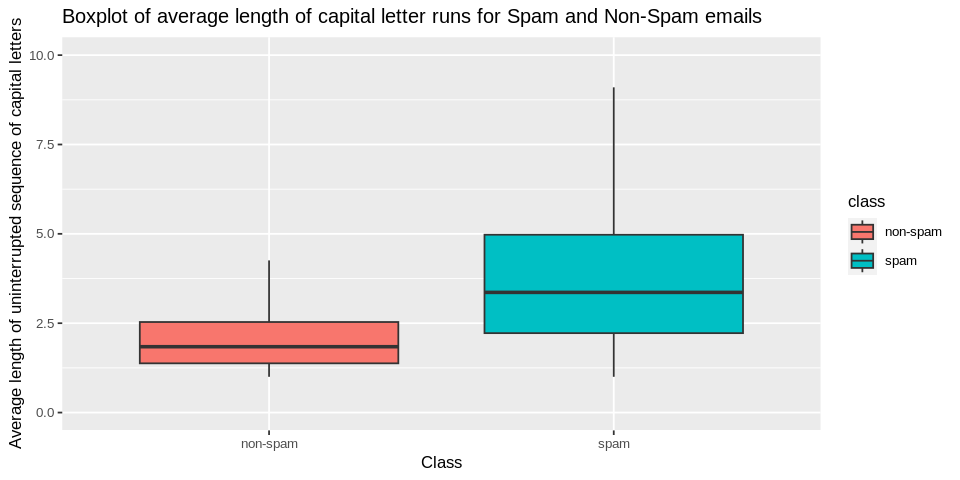

In [11]:
options(repr.plot.width = 8, repr.plot.height = 4)
spam_boxplot

Warning message:
“Removed 42 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


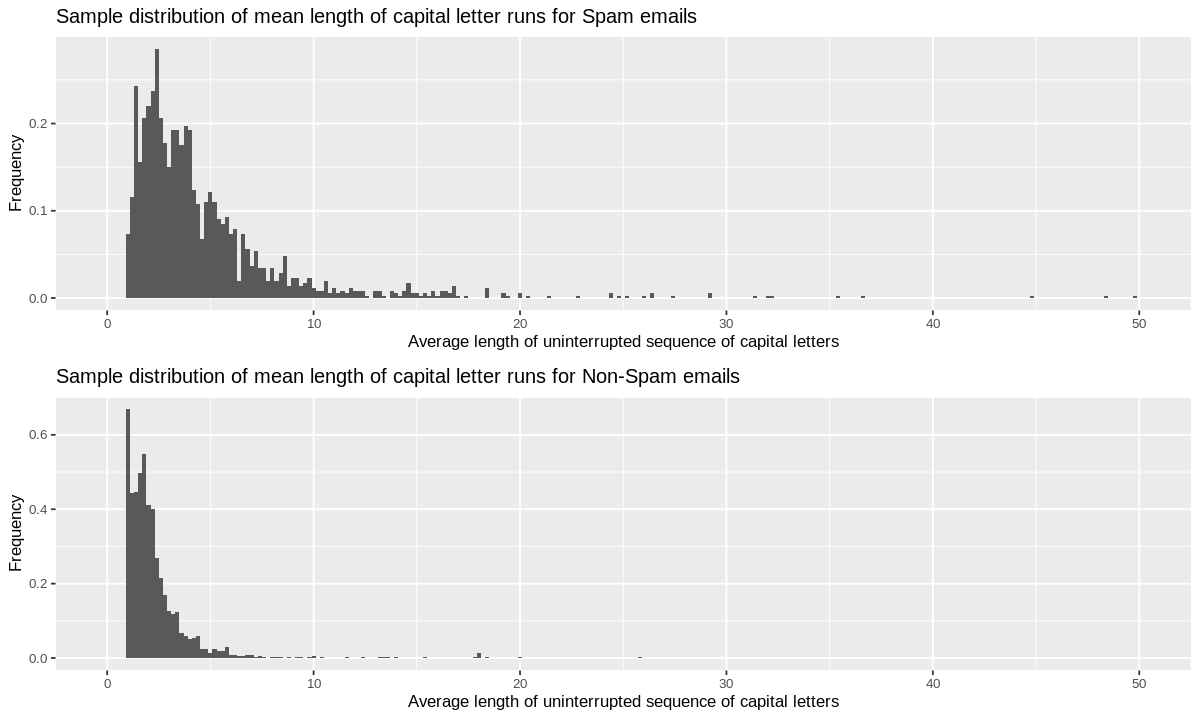

In [12]:
options(repr.plot.width = 10, repr.plot.height = 6)
plot_grid(spam_histogram, non_spam_histogram, ncol = 1)

*Note: some larger values/outliers are not pictured in order to fit the majority of values

Spam emails seem to typically have a greater average length with a wider range.
The distributions for both are unimodal and strongly right-skewed.

Based on these results, we might believe spam has longer capital letter sequences. For instance, an email with unusually long sequences of capitals is suspect.

## Methods: Plan

Assuming `Spambase` is a representative sample, our estimates of the mean values for capital letter sequences of spam and non-spam emails are likely to be good approximations of the true values, especially given the samples' large size. However, our point estimates do not measure how close they are likely to be to the true values: we do not know their uncertainty. Therefore, we cannot use these results without further work.

For our analysis, we will build a confidence interval of the difference in means to obtain a range of values that we are confident it contains the true difference. Since both samples are large (1812 spam, 2788 non-spam), we could use the theory-based approach, assuming the sampling distribution is approximately normal by the Central Limit Theorem; or use bootstrapping, which makes no such assumption.  
We will perform a two-sample t-test for the difference in means, using $H_0: \mu_1 = \mu_0$ vs $H_1: \mu_1\neq \mu_0$, where 1 and 0 represent spam and non-spam. If there is a difference, we would expect to gain evidence of it from these inferences.

Our analysis could aid individuals in purging unsolicited messages, or help legitimate marketers avoid being mistaken for spam. While plenty of models to detect spam exist, human-interpretable data may enable informed improvements.

Although our study is limited to sequences of capital letters, the dataset contains many more variables. 
An immediate followup is:  
What other patterns exist? Which are associated with spam and non-spam? 

## References

Cranor, L. F., & LaMacchia, B. A. (1998, August). Spam! *Communications of the ACM*, 41(8), 74–83. https://doi.org/10.1145/280324.280336.

Hopkins, M., Reeber, E., Forman, G., & Suermondt, J. (1999). Spambase. UCI Machine Learning Repository. https://doi.org/10.24432/C53G6X.

Wang, Irani, & Pu. (2013, October 20). A study on evolution of email spam over fifteen years. *9th IEEE International Conference on Collaborative Computing: Networking, Applications and Worksharing*. http://dx.doi.org/10.4108/icst.collaboratecom.2013.254082.
